Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

!pip install squarify
import squarify
from scipy.stats import mannwhitneyu

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df_1 = pd.read_csv('/datasets/query_1.csv')
df_2 = pd.read_csv('/datasets/query_3.csv')
df_3 = pd.read_csv('/datasets/query_last.csv')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_1[:2]

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df_2[:2]

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000


In [7]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [8]:
df_3[:2]

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши


In [9]:
df_3[['festival_week','festival_name']]

,festival_week,festival_name
0,30.0,Park Live
1,31.0,Пикник Афиши
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,36.0,Видфест
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


### Промежуточный вывод

- df_1 - выглядит готовым
- df_2 - можно привести число полетов к целому значению.
- df_3 - пропуски в столбцах festival_week и festival_name в недели без фестивалей. Информация festival_week несет булевые значения и дублирует как номер недели так и будево значение из festival_name. но по факту просто дублируется номер недели. festival_week удалю. Пропуски в столбце festival_name заполню булевым значением.

### Проведу преобразования

In [10]:
df_2['average_flights'] = np.ceil(df_2['average_flights']).astype('int')
df_2[:2]

,city,average_flights
0,Абакан,4
1,Анадырь,1


In [11]:
df_3 = df_3[['week_number', 'ticket_amount', 'festival_name']]
df_3 = df_3.fillna('Без фестивалей')
df_3[:3]

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,Без фестивалей


### Предварительный анализ данных

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


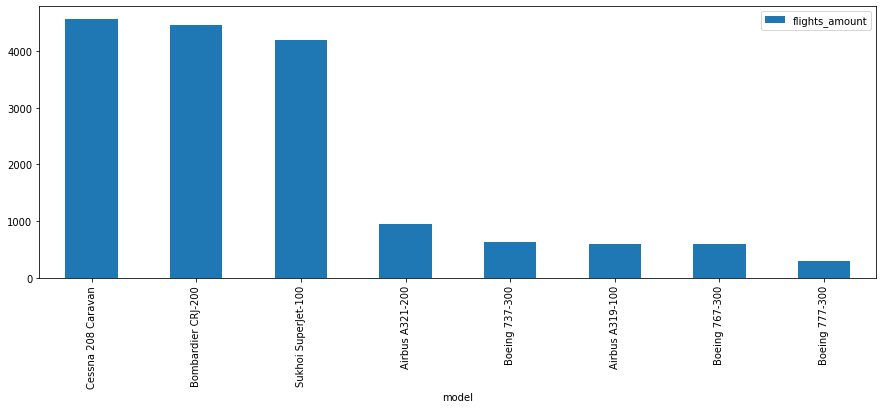

In [12]:
df_1.sort_values(by='flights_amount', ascending=False).plot(kind='bar', x = 'model', figsize=(15,5))
df_1.describe()

### Очевидно что малая авиация с предельной дальностью меньше 2000 летает чаще и видимо ближе, а также перевозит меньшее количество пасажиров. В Цесне 14 мест, Бомбардье 50. Cреднемагистральный Сухой перевозит 103 человека на расстояние 2700 км, против 220 мест и 5600 км у  ближайшего по размерам А321-200

In [13]:
df_2.describe()

,average_flights
count,101.000000
mean,5.841584
std,13.139051
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,130.000000


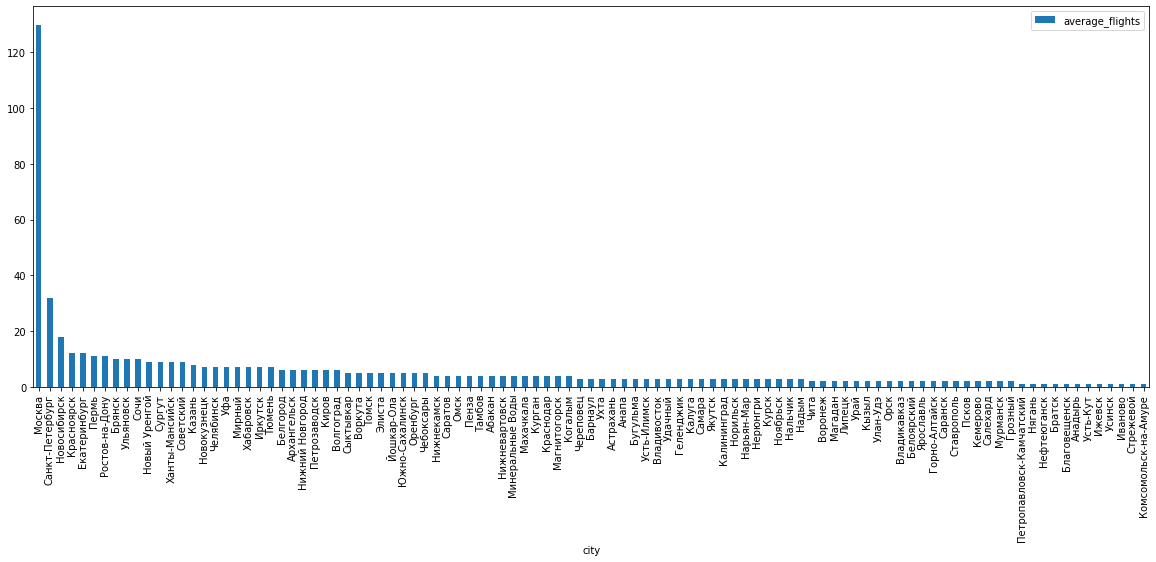

In [14]:
df_2.sort_values(by='average_flights', ascending=False).plot(kind='bar', rot=90,x = 'city', y = 'average_flights', figsize=(20,7))

В датасете представлены данные о полетах в 101 город. Количество полетов варьируется от 1 до 129, среднее - 5. Медиана - 3. Hаспределение скошено вправо. Есть хабы в которые летают чаще остальных, но их немного. Они будут в топ-10 ниже.

In [15]:
top_city = df_2.sort_values(by='average_flights', ascending=False).head(10)
top_city['total_flights'] = top_city['average_flights'].sum()
top_city['per_flights, %'] = np.ceil(top_city['average_flights'] / top_city['total_flights'] * 100).astype('int')
top_city = top_city[['city', 'average_flights', 'per_flights, %']]
top_city

,city,average_flights,"per_flights, %"
43,Москва,130,51
70,Санкт-Петербург,32,13
54,Новосибирск,18,8
33,Красноярск,12,5
20,Екатеринбург,12,5
63,Пермь,11,5
67,Ростов-на-Дону,11,5
10,Брянск,10,4
84,Ульяновск,10,4
74,Сочи,10,4


In [16]:
def square_chart (df, counts, title):
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = df[counts].values.tolist()
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

    plt.figure(figsize=(15,5), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

    plt.title(title)
    plt.axis('off')
    plt.show()

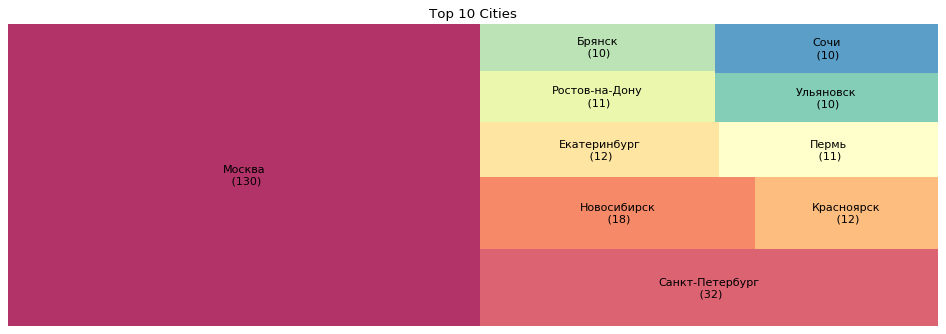

In [17]:
square_chart(top_city,'average_flights', 'Top 10 Cities')

### Вывод
Крупнейшие региональные и международные хабы, такие как Москва, СПб, Новосибирск - очевидно показывают самые высокие результаты. Дальше примерно на равных крупные региональные хабы - Красноярск, Екатеринбург, Пермь, Ростов-на-Дону. Интересным исключением являются Ульяновск и Брянск, попавшие в наш топ в первом случае по причине того, что в Ульяновске большое количество иностранных производств, а также крупнейший в европейском регионе России воздушный грузовой хаб, ну и единственное авиремонтное предприятие Авиастар. Брянск географически расположен в регионе пешего пересечения границы с ЕС и Украиной. 

# 2. Проверка гипотезы

- Нулевая гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»;
- Альтернативная гипотеза: «Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время».


- Пороговое значение alpha  0.05

In [18]:
alpha = .05

fest_only = df_3.query('festival_name != "Без фестивалей"')
fest_only = fest_only['ticket_amount']

no_fest = df_3.query('festival_name == "Без фестивалей"') 
no_fest = no_fest['ticket_amount']

results = stats.ks_2samp(
    fest_only, 
    no_fest)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 0.16666666666666685
Не удалось отвергнуть нулевую гипотезу


### Манна - Уитни

In [19]:
alpha = 0.05

stat, p = mannwhitneyu(fest_only, fest_only)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
    #Same distribution
    print("Не удалось отвергнуть нулевую гипотезу")
else:
    #Different distribution
    print("Отвергаем нулевую гипотезу")

Statistics=4.500, p=0.410
Не удалось отвергнуть нулевую гипотезу


## Вывод

### Это вам не Бернин Мэн, куда ездят посмотреть других и показать себя, сажая самолеты прямо в Блэк-Рок Сити, который принимает их только раз в году во время фестиваля. На Нашествие хоть и ездит больше народу, но в основном на машинах и электричках.


### Были исследованы 3 набора данных:
- df_1 - данные о количестве рейсов для каждой модели самолетов в сентябре 2018 года;
- df_2 - данные о среднем количестве рейсов, прибывающих в каждый из 101 города за день в сентябре 2018 года;
- df_3 - данные о фестивалях и количестве проданных авиабилетов на той же неделе, когда проходил фестиваль.

### Гипотезу о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время отвергнуть не удалось. В России редко летают на фестивали на самолетах.